<a href="https://colab.research.google.com/github/ishwarvenugopal/ML_Implementation/blob/master/PCA_and_Outlier_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import cluster, datasets, metrics
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
n_samples = 1500 # no.of.data points 

noisy_moons,moon_labels = datasets.make_moons(n_samples=n_samples, noise=.1) # Generate Moon Toy Dataset

In [0]:
pd.DataFrame(noisy_moons).head()

,0,1
0,0.127133,0.869827
1,0.444858,0.932666
2,0.006621,0.981050
3,1.919463,-0.009814
4,0.086347,0.586352


In [0]:
pd.DataFrame(moon_labels).head()

,0
0,0
1,0
2,0
3,1
4,1


In [0]:
# Put in Array
noisy_moons=np.array(noisy_moons)

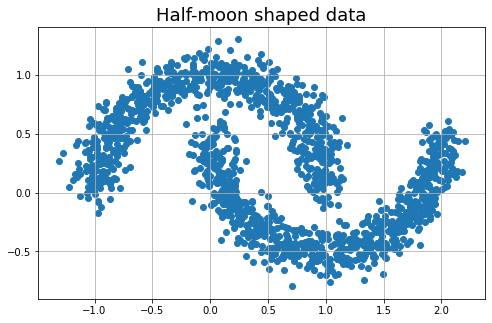

In [0]:
# Plot Half-moon data
plt.figure(figsize=(8,5))
plt.title("Half-moon shaped data", fontsize=18)
plt.grid(True)
plt.scatter(noisy_moons[:,0],noisy_moons[:,1])
#plt.savefig('HALF_MOON.png', dpi=300)
plt.show()

# Principal Component Analysis (PCA)

In [0]:
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
noisy_moons_spca = scikit_pca.fit_transform(noisy_moons)

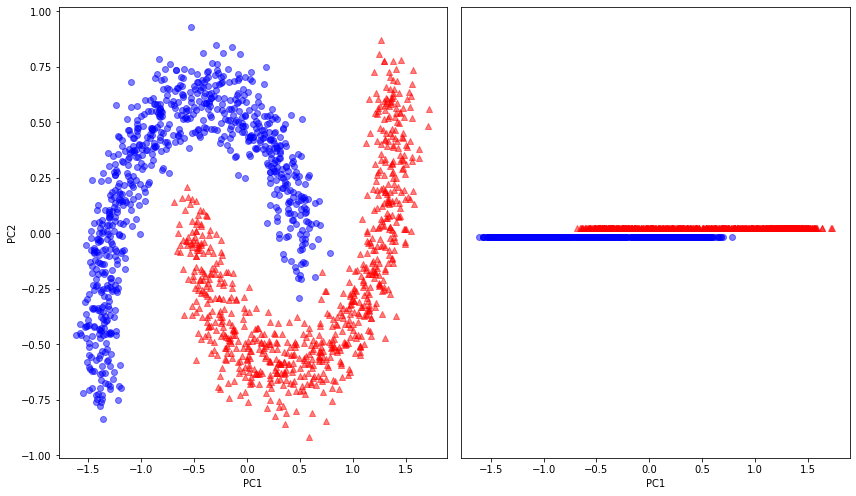

In [0]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))

ax[0].scatter(noisy_moons_spca[moon_labels == 0, 0], noisy_moons_spca[moon_labels == 0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(noisy_moons_spca[moon_labels == 1, 0], noisy_moons_spca[moon_labels == 1, 1], color='blue', marker='o', alpha=0.5)

ax[1].scatter(noisy_moons_spca[moon_labels == 0, 0], np.zeros((750, 1)) + 0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(noisy_moons_spca[moon_labels == 1, 0], np.zeros((750, 1)) - 0.02, color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
#plt.savefig('PCA_MOON.png', dpi=300)
plt.show()

# Outlier Detection

In [0]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples=100, contamination = 0.01)
clf.fit(noisy_moons)
y_pred_train = clf.predict(noisy_moons)

pos = y_pred_train > 0
neg = y_pred_train < 0

1485
15


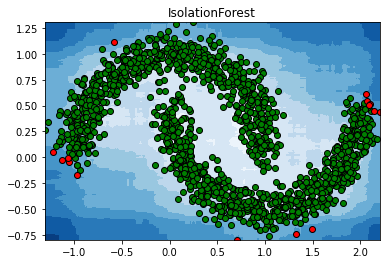

In [0]:
# plot the line, the samples, and the nearest vectors to the plane

xx, yy = np.meshgrid(np.linspace(min((noisy_moons[:, 0])), max((noisy_moons[:, 0])), 500), np.linspace(min((noisy_moons[:, 1])), max((noisy_moons[:, 1])), 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(noisy_moons[pos][:, 0], noisy_moons[pos][:, 1], c='green', edgecolor='k')
b2 = plt.scatter(noisy_moons[neg][:, 0], noisy_moons[neg][:, 1], c='red', edgecolor='k')

plt.axis('tight')

plt.xlim((xx.min(), xx.max()))
plt.ylim((yy.min(), yy.max()))

plt.savefig('OUTLIER_MOON.png', dpi=300)
print(pos.sum())
print(neg.sum())